In [1]:
import numpy as np
import pylab as plt
from sklearn.decomposition import PCA, NMF

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

X,y = load_mnist('./fashionmnist/')

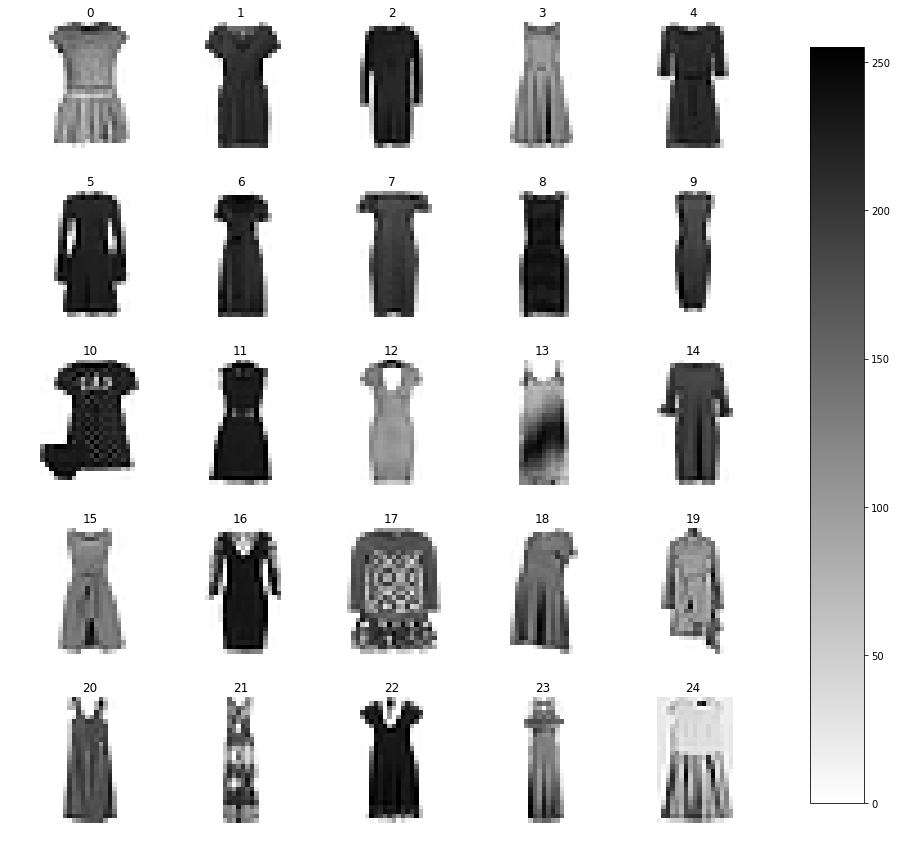

In [43]:
c = 3 # choose class 3
X3 = X[y==c] # select class
llength = int(np.sqrt(X.shape[1])) # get length of x,y for reshape

# preapre 25 plots
fig, axs = plt.subplots(5,5, figsize=(15, 15), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(25):
    im = axs[i].imshow(X3[i].reshape(llength,llength),cmap='gray_r')
    axs[i].set_title(str(i))
    axs[i].axis('off')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
    
fname = './images/class-'+str(c)+'-original.png'
plt.savefig(fname)

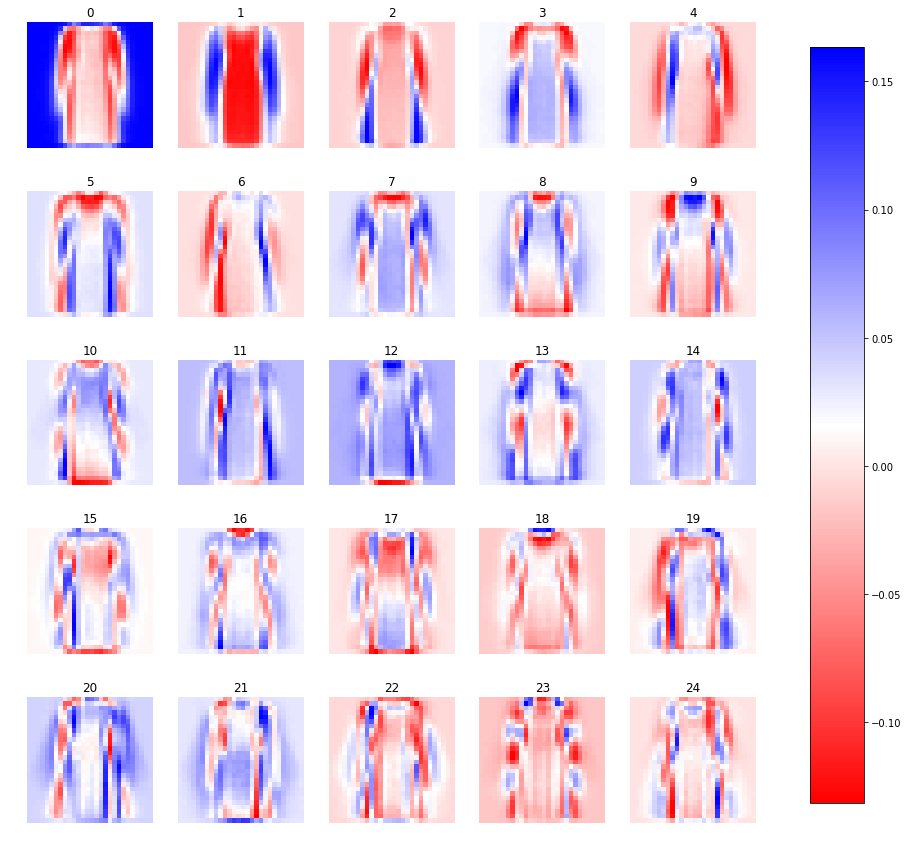

In [44]:
# PCA
n_components=25
pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X3)

eigenfaces = pca.components_.reshape((n_components, llength, llength))

fig, axs = plt.subplots(5,5, figsize=(15, 15), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(25):
    im = axs[i].imshow(eigenfaces[i].reshape(llength,llength),cmap='bwr_r')
    axs[i].set_title(str(i))
    axs[i].axis('off')
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)


fname = './images/class-'+str(c)+'-pca25.png'

plt.savefig(fname)

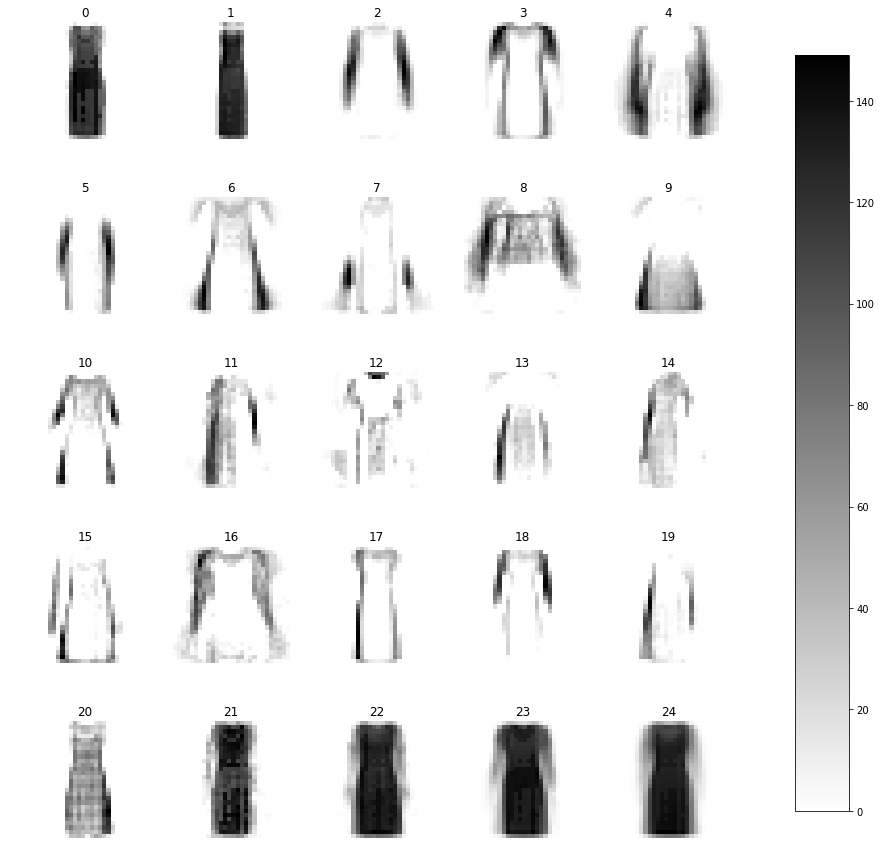

In [45]:
# NMF
nmf = NMF(n_components=n_components,init='nndsvda', tol=5e-3).fit(X3)

nmffaces = nmf.components_.reshape((n_components, llength, llength))

fig, axs = plt.subplots(5,5, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(25):
    im = axs[i].imshow(nmffaces[i].reshape(llength,llength),cmap='gray_r')
    axs[i].set_title(str(i))
    axs[i].axis('off')
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)


fname = './images/class-'+str(c)+'-nmf25.png'
plt.savefig(fname)